In [5]:
N = 15
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
number_col = cols[N % 7]
print(number_col)


Sleep_Hours


Итого, данные для обработки мы будем брать из столбца Sleep_Hours датасета teen_phone_addiction_dataset.csv.

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import typing as tp
from collections import Counter
import statistics

url = "https://raw.githubusercontent.com/poluzerovT/oiad-2-2025/master/datasets/teen_phone_addiction_dataset.csv"
df = pd.read_csv(url)
data = df[number_col]

Скачиваем датасет

Среднее= 6.489766666666668
Дисперсия= 2.221485278888902
Мода= 6.1
Медиана= 6.5
Квантиль_25= 5.5
Квантиль_5= 6.5
Квантиль_75= 7.5
Эксцесс данных= -0.2969486466071465
Асимметрия данных= 0.011848322655812933
Интерквартильный размах= 2.0


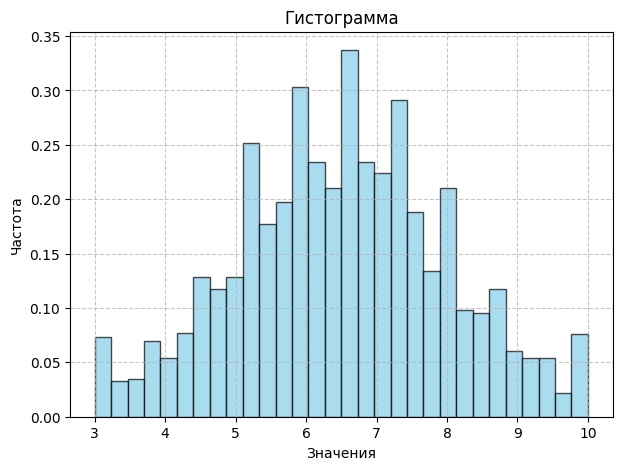

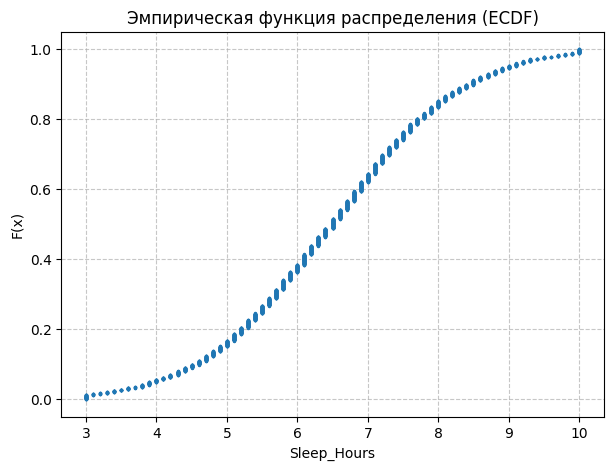

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import typing as tp
from collections import Counter
import statistics

# I

mean = np.mean(data)
print('Среднее=', mean)
var = np.var(data)
print('Дисперсия=', var)
mode = statistics.mode(data)
print('Мода=', mode)
median = statistics.median(data)
print('Медиана=', median)

quantile_25 = np.quantile(data, 0.25)
print('Квантиль_25=', quantile_25)
quantile_5 = np.quantile(data, 0.5)
print('Квантиль_5=', quantile_5)
quantile_75 = np.quantile(data, 0.75)
print('Квантиль_75=', quantile_75)

kurt = stats.kurtosis(data)
print('Эксцесс данных=', kurt)
asymmetry = stats.skew(data)
print('Асимметрия данных=', asymmetry)

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
print('Интерквартильный размах=', IQR)

plt.figure(figsize=(7,5))
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

x = np.sort(data)
y = np.arange(1, len(x)+1) / len(x)
plt.figure(figsize=(7,5))
plt.plot(x, y, marker='.', linestyle='none', markersize=3)
plt.title("Эмпирическая функция распределения (ECDF)")
plt.xlabel("Sleep_Hours")
plt.ylabel("F(x)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Выводы

#Так как ассиметрия чуть больше нуля, можем сделать вывод, что распределение почти симметричное, но с более тяжелым правым хвостом
#Еще по графикам может предположить, что распределение унимодальное


72.05670214948869
False
Значение p_value:  0.000563870957332659  Результат проверки гипотезы(что она отвергается):  True


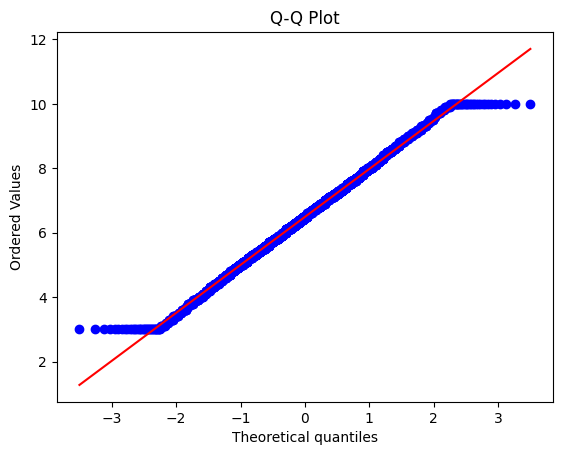

In [8]:
# II
from scipy.stats import norm, chi2
def chi_square_test(df: tp.List[float], alpha=0.05) -> bool:
    n = len(data)
    k = 1 + int(np.log2(n))
    intervals = np.linspace(min(data), max(data), k + 1)
    real_freq, bin_edges = np.histogram(data, bins=intervals)
    expected_freq = np.array([norm.cdf(bin_edges[i + 1], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) - norm.cdf(
        bin_edges[i], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) for i in range(k)]) * n
    chi_stat = np.sum((real_freq - expected_freq) ** 2 / (expected_freq))
    print(chi_stat)
    deg = k - 1 - 2
    return chi_stat < chi2.ppf(1-alpha, deg)
print(chi_square_test(df[number_col]))
_, p_value = stats.normaltest(df[number_col])
print('Значение p_value: ', p_value, ' Результат проверки гипотезы(что она отвергается): ', p_value < (alpha := 0.05))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Выводы

#Получается по результатам, нулевая гипотеза о том, что распредление данных близко к нормлаьному, опровергнута
#График Q-Q plot также показывает, что на концах наблюдаемое распределение отличается от нормального


[3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]
Лучшее преобразование: 2 p-value = 0.000744904783912936
Среднее= 3.339550858072471e-16
Дисперсия= 2.221485278888902
Мода= -0.25545499316190984
Медиана= 0.013025131675076651
Квантиль_25= -0.6599227001264553
Квантиль_5= 0.013025131675076651
Квантиль_75= 0.6805190306647302
Эксцесс данных= -0.2911472081765165
Асимметрия данных= -0.020130099703466166
Интерквартильный размах= 1.3404417307911856


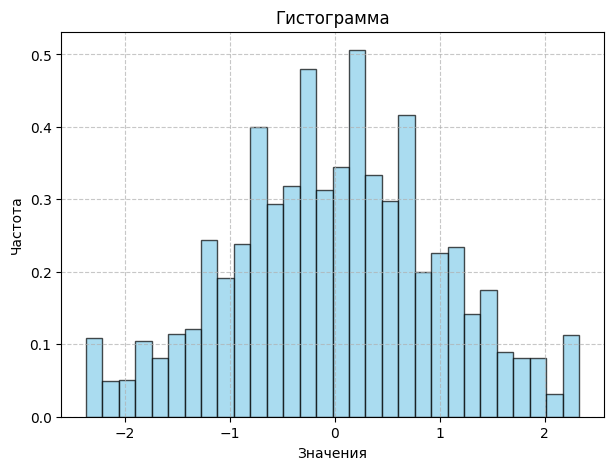

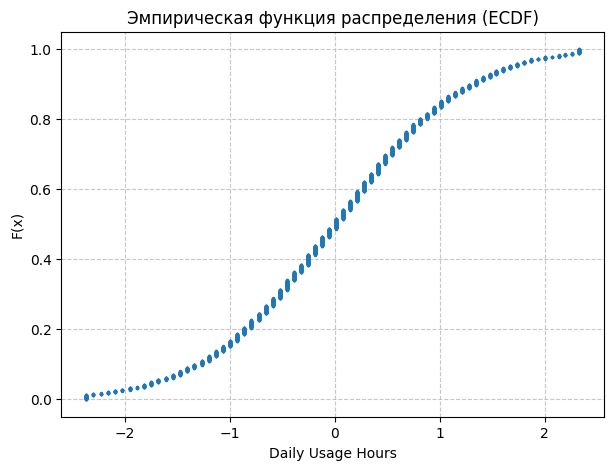

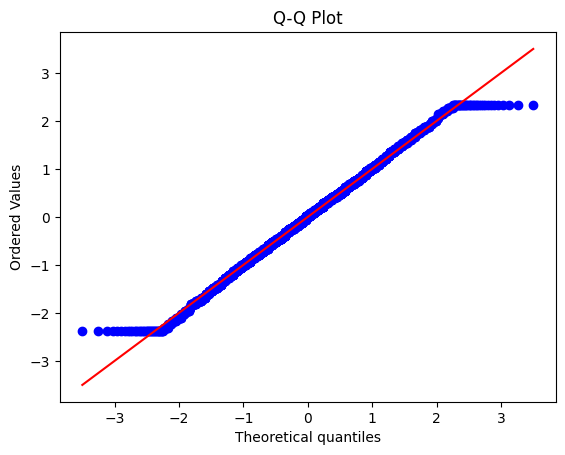

In [9]:
# III
print(sorted(Counter(df[number_col]).keys()))
from scipy.stats import boxcox, zscore
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

pt = PowerTransformer(method='yeo-johnson')
qt = QuantileTransformer(output_distribution="normal")

datas = [
    stats.zscore(np.log(df[number_col] - np.min(df[number_col]) + 1e-12)),
    stats.zscore(df[number_col]),
    pt.fit_transform(df[[number_col]]).ravel(),
    np.sqrt(df[number_col] - np.min(df[number_col]) + 1e-12),
    1.0 / (df[number_col] - np.min(df[number_col]) + 1e-12),
    qt.fit_transform(df[[number_col]]).ravel()
]
datas_res = [stats.normaltest(arr)[1] for arr in datas]
max_idx = int(np.argmax(datas_res))
data_new = datas[max_idx]

print("Лучшее преобразование:", max_idx, "p-value =", datas_res[max_idx])

mean = np.mean(data_new)
print('Среднее=', mean)
var = np.var(data)
print('Дисперсия=', var)
mode = statistics.mode(data_new)
print('Мода=', mode)
median = statistics.median(data_new)
print('Медиана=', median)

quantile_25 = np.quantile(data_new, 0.25)
print('Квантиль_25=', quantile_25)
quantile_5 = np.quantile(data_new, 0.5)
print('Квантиль_5=', quantile_5)
quantile_75 = np.quantile(data_new, 0.75)
print('Квантиль_75=', quantile_75)

kurt = stats.kurtosis(data_new)
print('Эксцесс данных=', kurt)
asymmetry = stats.skew(data_new)
print('Асимметрия данных=', asymmetry)

Q1 = np.percentile(data_new, 25)
Q3 = np.percentile(data_new, 75)
IQR = Q3 - Q1
print('Интерквартильный размах=', IQR)

plt.figure(figsize=(7,5))
plt.hist(data_new, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

x = np.sort(data_new)
y = np.arange(1, len(x)+1) / len(x)
plt.figure(figsize=(7,5))
plt.plot(x, y, marker='.', linestyle='none', markersize=3)
plt.title("Эмпирическая функция распределения (ECDF)")
plt.xlabel("Daily Usage Hours")
plt.ylabel("F(x)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


stats.probplot(data_new, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Выводы
#Данные не удалось привести к нормальному распределению, по графикам по-прежнему наблюдается
#уномодальное  распределение, правый хвость чуть тяжелее

                  mean       var
School_Grade                    
10th          6.488296  2.102064
11th          6.367432  2.113079
12th          6.459735  2.201804
7th           6.483702  2.287617
8th           6.675311  2.406853
9th           6.468441  2.196945


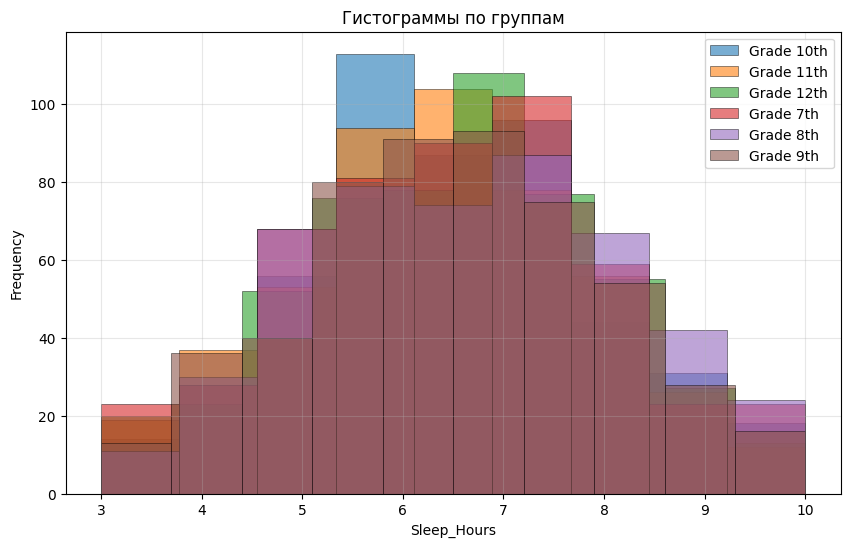

In [10]:
# 4
groups = pd.DataFrame(df).groupby('School_Grade')
group_stats = groups[number_col].agg(['mean', 'var'])
print(group_stats)
plt.figure(figsize=(10, 6))
for i, (grade, subset) in enumerate(groups):
    k = 1 + int(np.log2(len(subset)))
    plt.hist(subset[number_col], bins=k, alpha=0.6, label=f"Grade {grade}", edgecolor='black', linewidth=0.5)
plt.xlabel(number_col)
plt.ylabel("Frequency")
plt.title("Гистограммы по группам")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Выводы
#Дисперсия и среднее значение зависят от класса, можно заметить, что 9 и 12 класс распределены почти с одинаковыми параметрами, остальные разнятся.
#То есть возможно, что данные пришли из разных распределений (хотя код ниже говорит, что мы не можем отвергнуть гипотезу, что средние и медианы в группах имеют равные значение)

